In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (466/466), done.
Checking out files: 100% (104/104), done.


In [2]:
%cd yolov7

/content/drive/MyDrive/yolov7


In [ ]:
!pip install -r requirements.txt

In [ ]:
!unzip /content/drive/MyDrive/yolov7_data/DLCV_Majong.v2i.yolov7pytorch.zip -d Majong

Archive:  /content/drive/MyDrive/yolov7_data/DLCV_Majong.v2i.yolov7pytorch.zip


In [ ]:
!python3 train.py --batch 10 --cfg cfg/training/yolov7.yaml --img 640 640 --epochs 400 --data ./Majong/data.yaml --weights 'yolov7.pt' --name yolov7 --hyp data/hyp.scratch.custom.yaml --device 0 

YOLOR 🚀 v0.1-115-g072f76c torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=10, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='./Majong/data.yaml', device='0', entity=None, epochs=400, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov717', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=10, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0

In [ ]:
# Start tensorboard
# Launch after you have started training to all the graphs needed for inspection
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir /runs

In [23]:
!python3 detect.py --weights './runs/train/yolov714_pre_250_sclae-2.0_paste/weights/best.pt' --conf 0.1 --source ./Majong/test/test1.jpg --img-size 640

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='./Majong/test/test1.jpg', update=False, view_img=False, weights=['./runs/train/yolov714_pre_250_sclae-2.0_paste/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.0+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36702926 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2 bamboo-1

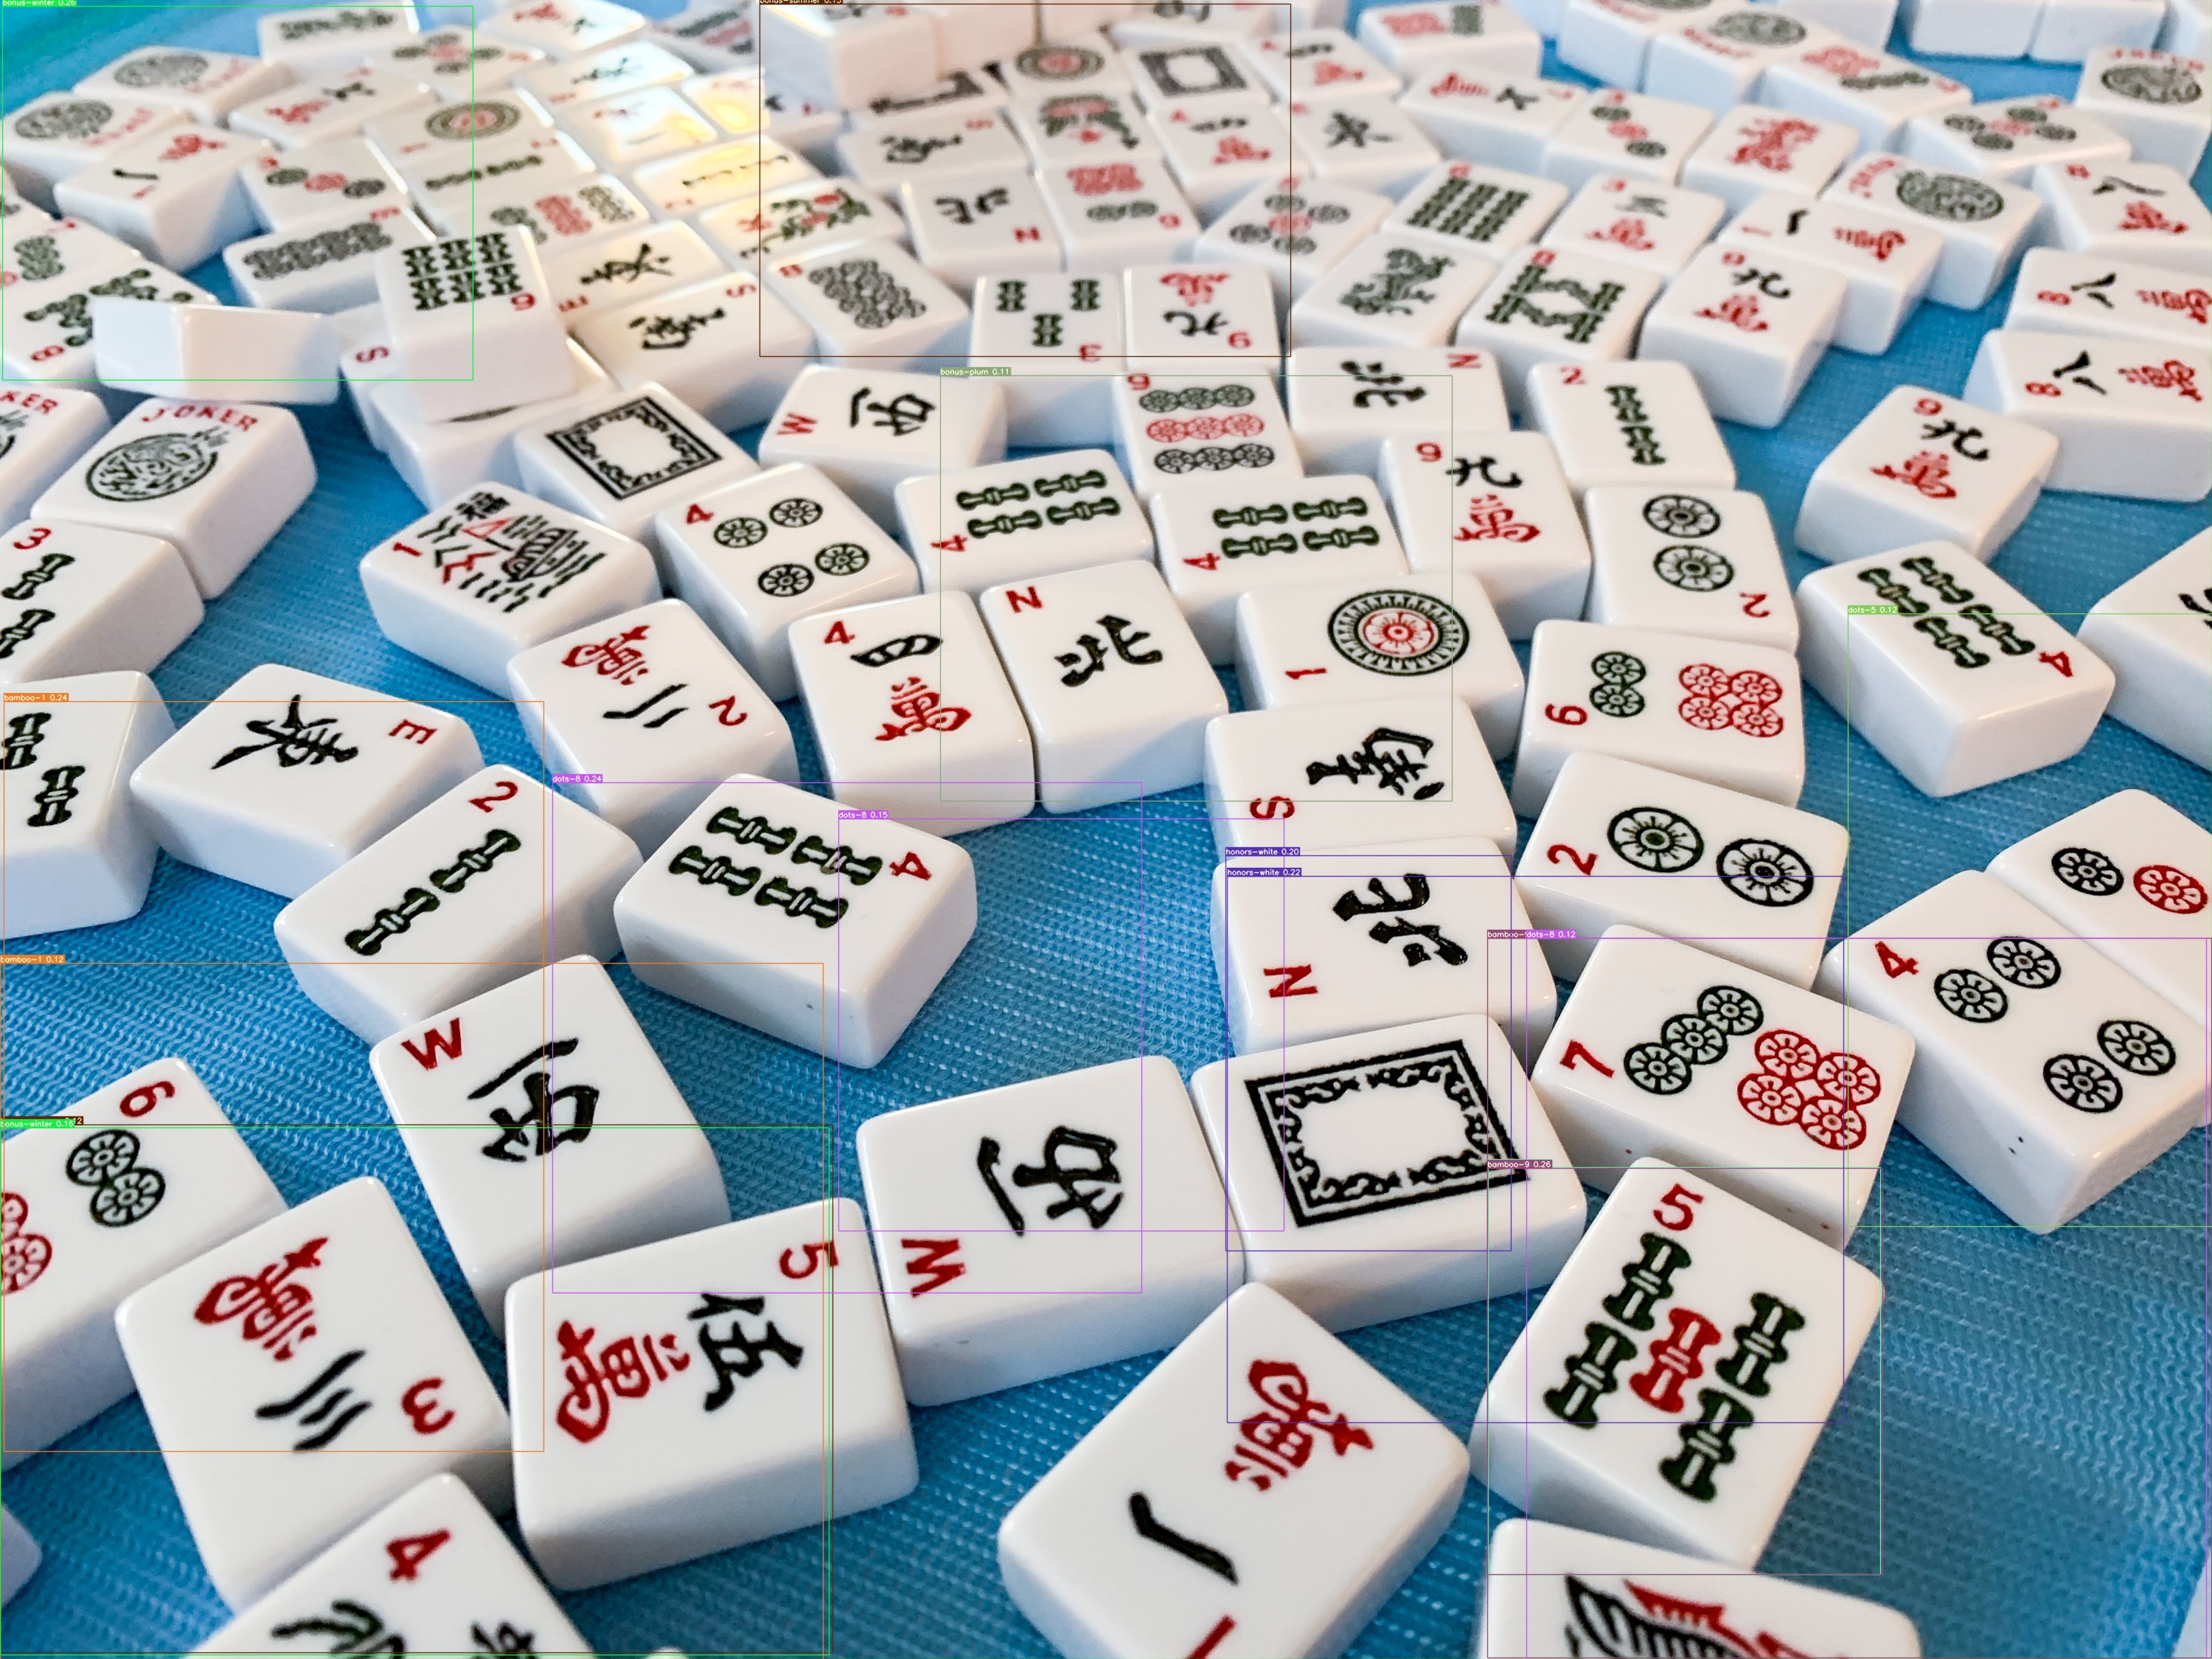

In [24]:
import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/yolov7/runs/detect/exp20/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1